### Case study on Unsupervised Learning

 Do the following in the wine dataset.
 1. Read the dataset to the python environment.
 2. Try out different clustering models in the wine dataset.
 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


#### 1. Read the dataset to the python environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

wine_data = pd.read_csv('Wine.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
wine_data.shape

(178, 13)

In [5]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

##### Inference :-
This data set consists of 178 rows and 13 features, and as seen in the info above all the features are numerical data.And also, there are no null values in the dataset.

#### 2.Try out different clustering models in the wine dataset.

##### Exploratory Data Analysis

<AxesSubplot:>

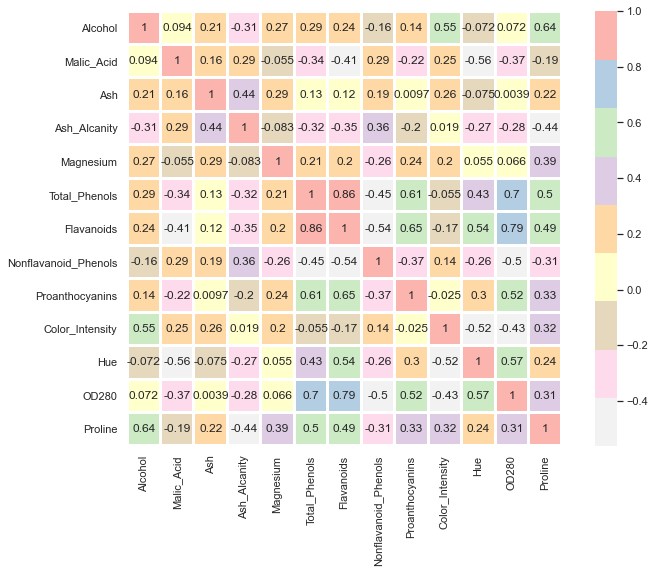

In [6]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(), annot=True, linewidths=2, square=True, cmap="Pastel1_r")

Inference :-
    From the above heatmap we can see that Flavanoids and Total_Phenols are highly correlated features.

#### i) K-Means Clustering Method

In [7]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 5)
model_kmeans.fit(wine_data)
labels = model_kmeans.predict(wine_data)
print(labels)

[0 0 0 3 4 3 3 3 0 0 3 3 3 0 3 3 3 0 3 4 4 4 0 0 4 4 0 3 4 0 3 3 0 3 0 4 4
 0 0 4 4 0 0 2 4 0 0 0 0 3 0 3 0 3 0 0 0 3 3 1 2 1 2 1 1 2 1 1 4 2 4 1 1 0
 4 1 1 1 4 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 4 2 1 2 1 2 2 1 1 2 1 1 1 1 2 2
 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 1 2 2 2 4 1 2 4 4 1 2
 2 2 1 1 1 2 2 2 1 4 2 2 1 2 2 2 2 1 2 2 4 2 1 1 2 4 4 4 4 2]


In [8]:
model_kmeans.inertia_

916379.1871539167

For a good clustering model the inertia should be low.

In [9]:
#Elbow method
ks = range(1,10)
inertia=[]
for k in ks:
    model_kmeans=KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=40)
    model_kmeans.fit(wine_data)
    inertia.append(model_kmeans.inertia_)

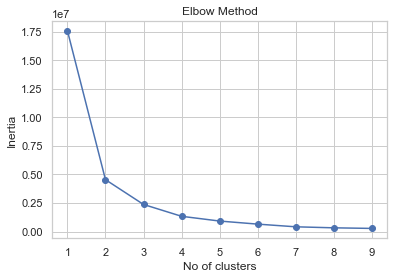

In [10]:
plt.plot(ks,inertia, '-o')
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

As per the graph above we can take the no. of optimum clusters as 3.

In [11]:
model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(wine_data)
labels = model_kmeans.predict(wine_data)
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


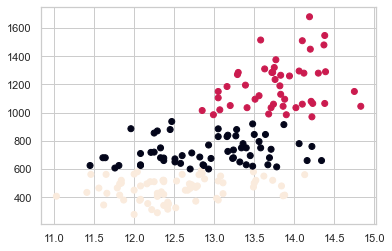

In [12]:
al = wine_data["Alcohol"]
pr = wine_data["Proline"]
plt.scatter(al,pr,c=labels)

We can see three clusters of data formed as seen above in the scatter plot

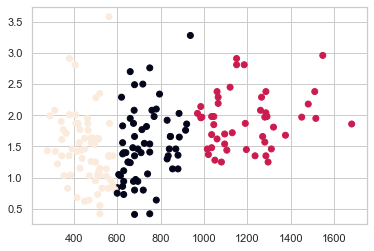

In [13]:
pl = wine_data["Proline"]
pc = wine_data["Proanthocyanins"]
plt.scatter(pl,pc,c=labels)

In [14]:
model_kmeans.inertia_

2370689.6867829696

Since the inertia value is very high we will go for standardscaling

In [15]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
pipe= make_pipeline(scaler,model_kmeans)
pipe.fit(wine_data)
labels_sc=pipe.predict(wine_data)
print(labels_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
model_kmeans.inertia_

1277.928488844643

As seen above inertia value is very less now and hence the model is improved.


#### ii) Agglomerative Hierarchical Clustering

##### Normalization
To get a better model we first normalize the data

In [17]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()
wine_df=norm.fit_transform(wine_data)

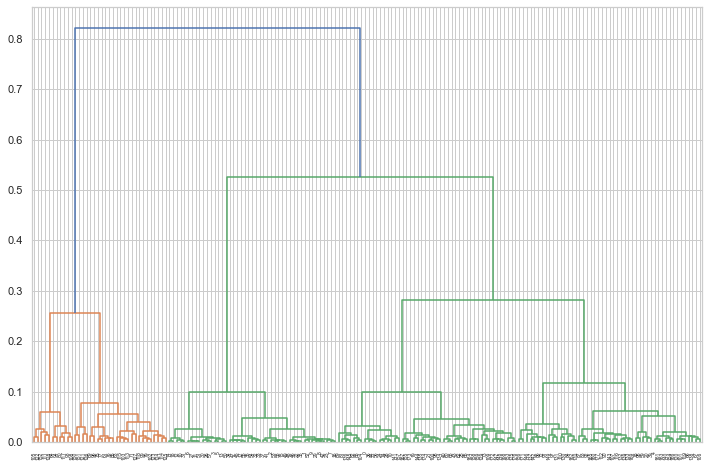

In [18]:
#Using Dendrograms to find the optimum no. of cluster

from scipy.cluster.hierarchy import dendrogram,linkage

linked=linkage(wine_df,method="ward")
plt.figure(figsize=(12,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

From the plot above, we can get the optimum no. of clusters as 3

In [19]:
x2=wine_data.iloc[:,[3,4]].values

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc=cluster.fit_predict(x2)
y_hc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int64)

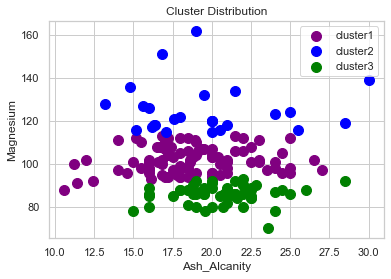

In [21]:
plt.scatter(x2[y_hc == 0,0], x2[y_hc == 0,1], s = 100, c = 'purple', label = 'cluster1')
plt.scatter(x2[y_hc == 1,0], x2[y_hc == 1,1], s = 100, c = 'blue', label = 'cluster2')
plt.scatter(x2[y_hc == 2,0], x2[y_hc == 2,1], s = 100, c = 'green', label = 'cluster3')
plt.title('Cluster Distribution')
plt.xlabel("Ash_Alcanity")
plt.ylabel("Magnesium")
plt.legend()
plt.show()

From the above graph we can see the agglomerative cluster distribution of Magnesium and Ash_Alcanity features in 3 clusters which we have considered here for this modelling